# Learning and Intelligent Decision Making

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
# %matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

# Actions
A = ['U', 'D', 'L', 'R']

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function
             
Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
nS = len(S)
nA = len(A)

Q = np.zeros((nS, nA))
error = 1
i = 0

while error > 1e-8:
    
    Qnew = np.zeros((nS, nA))
    V = np.max(Q, axis=1)

    for a in range(nA):
        Qnew[:, a] = Rw[:, a] + gamma * P[a].dot(V)
    
    error = la.norm(Q - Qnew)
    i = i + 1
    Q = Qnew
    
Qopt = Q
Pol = np.argmax(Qopt, axis=1)

print('Concluded in', i, 'iterations.')

print('Qopt = ')
print(Qopt)

print('Optimal policy:')

for i in range(len(S)):
    print('State', S[i], '-', A[Pol[i]])

Concluded in 2041 iterations.
Qopt = 
[[ 94.15  94.15  94.15  95.1 ]
 [ 88.43  89.32  88.43  87.55]
 [ 92.98  92.05  93.92  92.05]
 [ 95.34  96.31  94.39  96.31]
 [ 87.33  88.21  88.21  87.33]
 [ 91.82  90.9   92.75  91.82]
 [ 96.55  97.52  95.58  96.55]
 [ 88.65  90.45  89.55  88.65]
 [ 92.75  90.9   91.82  90.9 ]
 [ 95.58  95.58  96.55  97.52]
 [ 87.55  88.43  89.32  88.43]
 [ 91.59  90.68  91.59  90.68]
 [ 96.79  97.77  96.79  98.75]
 [100.   100.    99.01 100.  ]
 [ 91.59  90.68  90.68  90.68]
 [ 96.31  95.34  95.34  95.34]]
Optimal policy:
State 1BR - R
State 2 - D
State 2R - L
State 2BR - D
State 3 - D
State 3R - L
State 3BR - D
State 4 - D
State 4R - U
State 4BR - R
State 5 - L
State 5R - U
State 5BR - R
State 6BR - U
State 7R - U
State 7BR - U


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

In [3]:
def egreedy(q, s, eps=0.1):
    '''
        egreedy(q, s) samples the eps-greedy policy w.r.t. q in
        state s.
        
        :param q: ndarray (Q-function)
        :param s: int (state index)
        :return a: int (action)
    '''
    
    nA = q.shape[1] #numero de acoes
    
    # Greedy policy
    qmax = q.max(axis=1, keepdims=True)
    pol = np.isclose(q, qmax, atol=1e-10, rtol=1e-10).astype(int)
    #print(pol)
    pol = eps / nA + (1 - eps) * pol / pol.sum(axis = 1, keepdims = True)
    #print(pol)
    
    return np.random.choice(nA, p=pol[s, :])

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state; 
* With this transition information (state, action, reward, next state), you can now perform an update. 
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

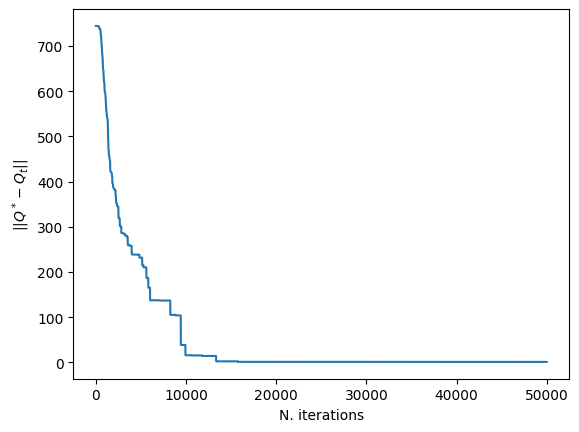

In [4]:
STEPS = 50000

# Initialize model
Pest = []
for a in range(nA):
    Pest += [np.eye(nS, nS)]

Rwest = np.zeros((nS, nA))

# Initialize Q-values and counter
Qmbl = np.zeros((nS, nA))
nmbl = np.ones((nS, nA))

# Initialize parameters
vmbl = np.zeros(STEPS)

# Initialize state
st = np.random.choice(nS)
#st = 3

# Run learning cycle
for t in range(STEPS):
    
    at = egreedy(Qmbl, st)
        
    # Reward (simulate)
    rt = Rw[st, at]
    
    # Next state (simulate)
    st1 = np.random.choice(nS, p=P[at][st, :])
    
    # Update estimated transitions
    # 𝑃*+, 𝑠’  𝑠*,𝑎*) = ]𝑃* 𝑠’  𝑠*,𝑎*) +𝛼 𝕀 𝑠*+, = 𝑠’ − ]𝑃* 𝑠’  𝑠*,𝑎*))
    Pest[at][st, :] *= (1 - 1 / (nmbl[st, at] + 1))  # (1 - 1/N+1)
    Pest[at][st, st1] += 1 / (nmbl[st, at] + 1)  # 
    
    # Update estimated reward
    Rwest[st, at] = Rwest[st, at] + 1 / (nmbl[st, at] + 1) * (rt - Rwest[st, at])
    
    # Update Q
    Qmbl[st, at] = Rwest[st, at] + gamma * Pest[at][st, :].dot(np.max(Qmbl, axis=1))
    
    if rt == 1.0:
        st = np.random.choice(nS)
    else:
        st = st1
        
    nmbl[st, at] += 1
    
    vmbl[t] = la.norm(Qmbl - Qopt)
                
plt.figure()
plt.plot(vmbl)
plt.xlabel('N. iterations')
plt.ylabel(r'$||Q^*-Q_t||$')
plt.show()

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

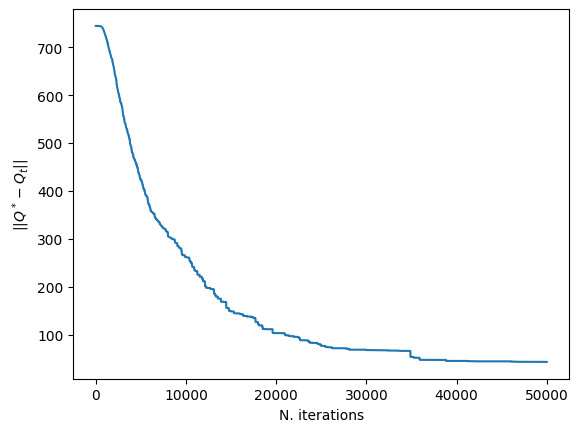

In [23]:
STEPS = 50000
alfa = 0.3
gamma = 0.99

# Initialize Q-values and counter
Qmbl = np.zeros((nS, nA))

vmbl = np.zeros(STEPS)

# Initialize state
st = np.random.choice(nS)

# Run learning cycle
for t in range(STEPS):
    
    at = egreedy(Qmbl, st)
        
    # Reward (simulate)
    rt = Rw[st, at]
    
    # Next state (simulate)
    st1 = np.random.choice(nS, p=P[at][st, :])
    
    # Update Q
    Qmbl[st, at] = Qmbl[st, at] + alfa*(rt + gamma*np.max(Qmbl[st1]) - Qmbl[st,at] )
    
    if rt == 1.0:
        st = np.random.choice(nS)
    else:
        st = st1
        
    vmbl[t] = la.norm(Qmbl - Qopt)
                
                
plt.figure()
plt.plot(vmbl)
plt.xlabel('N. iterations')
plt.ylabel(r'$||Q^*-Q_t||$')
plt.show()

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

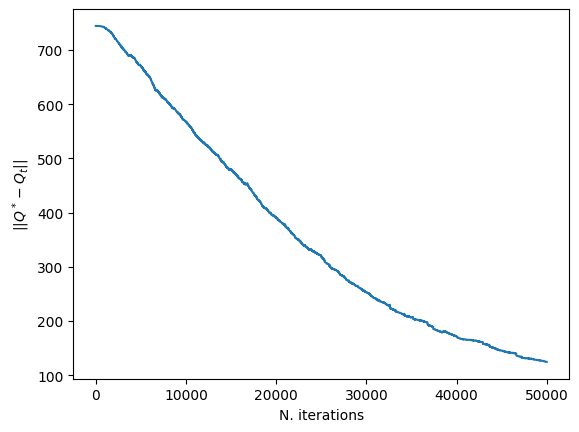

In [28]:
STEPS = 50000
alfa = 0.3
gamma = 0.99

# Initialize Q-values and counter
Qmbl = np.zeros((nS, nA))

vmbl = np.zeros(STEPS)

# Initialize state
st = np.random.choice(nS)
at = egreedy(Qmbl, st)

# Run learning cycle
for t in range(STEPS):
    

    # Reward (simulate)
    rt = Rw[st, at]
    
    # Next state (simulate)
    st1 = np.random.choice(nS, p=P[at][st, :])

    at1 = egreedy(Qmbl, st)
    
    # Update Q
    Qmbl[st, at] = Qmbl[st, at] + alfa*(rt + gamma*Qmbl[st1,at1] - Qmbl[st,at] )
    
    if rt == 1.0:
        st = np.random.choice(nS)
        at = egreedy(Qmbl, st)

    else:
        st = st1
        at =  at1
        
    vmbl[t] = la.norm(Qmbl - Qopt)
                
plt.figure()
plt.plot(vmbl)
plt.xlabel('N. iterations')
plt.ylabel(r'$||Q^*-Q_t||$')
plt.show()

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Write you answer here